# Importing Libraries...

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Data exploration and cleaning

## Some of the variables in this dataset had to be converted to binary for technical reasons.

In [2]:
df = pd.read_excel('info.xlsx')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Below is the total count of the default situation for customers.
## 0 stands for no, 1 stands for yes.

In [4]:
df['default'].value_counts(dropna = False)

0    44396
1      815
Name: default, dtype: int64

# Here, shows the term deposit subscribtion prefereances among customers
## Again, 0 stands for no, 1 stands for yes.

In [5]:
df['y'].value_counts(dropna = False)

0    39922
1     5289
Name: y, dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of        age  job  marital  education  default  balance  housing  loan  contact  \
0       58    0        1          3        0     2143        1     0      999   
1       44    1        0          2        0       29        1     0      999   
2       33    2        1          2        0        2        1     1      999   
3       47    3        1        999        0     1506        1     0      999   
4       33  999        0        999        0        1        0     0      999   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    1        1          3        0      825        0     0        0   
45207   71    4        2          1        0     1729        0     0        0   
45208   72    4        1          2        0     5715        0     0        0   
45209   57    3        1          2        0      668        0     0        1   
45210   37    2        1          2        0     2971        0     0       

# Below occurs the first step in making our ML model. How?
## By seperating the values that we think might have an impact on the outcome we're after (Shortlisting consistantly-paying customers), and making a comparison between those variables and the remaining ones to try and see if there's a realtion.

In [7]:
numeric_cols = ['y', 'campaign', 'loan', 'previous']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'default'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['y', 'campaign', 'loan', 'previous']
['age', 'balance', 'contact', 'day', 'duration', 'education', 'housing', 'job', 'marital', 'month', 'pdays', 'poutcome']


# Preperation of training and test datasets

In [8]:
testing_dataset_train = pd.get_dummies(df, columns = ['balance', 'education', 'pdays', 'poutcome'], drop_first = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,3,0,2143,1,0,999,5,5,261,1,-1,0,999,0
1,44,1,0,2,0,29,1,0,999,5,5,151,1,-1,0,999,0
2,33,2,1,2,0,2,1,1,999,5,5,76,1,-1,0,999,0
3,47,3,1,999,0,1506,1,0,999,5,5,92,1,-1,0,999,0
4,33,999,0,999,0,1,0,0,999,5,5,198,1,-1,0,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,3,0,825,0,0,0,17,999,977,3,-1,0,999,1
45207,71,4,2,1,0,1729,0,0,0,17,999,456,2,-1,0,999,1
45208,72,4,1,2,0,5715,0,0,0,17,999,1127,5,184,3,1,1
45209,57,3,1,2,0,668,0,0,1,17,999,508,4,-1,0,999,0


# Creating the train & test dataframes, based on the default rate.

In [12]:
random_seed = 4000
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = random_seed, stratify = df['default'])

## Train dataframe's output is telling us that 36168 people did not default on their loans, and only 17 did.
# That makes an estunishing 98.1973% non-defaulting ratio.

In [18]:
print(df_train.shape)
print()
print(df_train['default'].value_counts(normalize = True))

(36168, 17)

0    0.981973
1    0.018027
Name: default, dtype: float64


## On the contrary ,Test dataframe's (~20% of main data), shows us that only 9043 people did not default on their loans, and again 17 failed to do us.
# Similarly, a 98.1975% ratio was found for no defaulting.

In [19]:
print(df_test.shape)
print()
print(df_test['default'].value_counts(normalize = True))

(9043, 17)

0    0.981975
1    0.018025
Name: default, dtype: float64


# And then, we must transform the numerical variables (Scaling them) in order for them to fit in our model.

In [20]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['default']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

# Once the scaler model is successfully created above, we use it to make our logistic regression model.

In [21]:
clf = LogisticRegression(penalty = 'none')
clf.fit(X, y)

C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

# The above model is now ready for showcasing and evaluation

In [22]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

## This is our ROC curve (receiver operating characteristic curve), it's purpose is to show us how well did the model perform agianst our classification  thresholds (y, campaign, loan, previous).

# Basically demonstrating that a positive outcome in those thresholds mentioned above had usually caused a higher chance of the cusomers not defaulting on their loans.

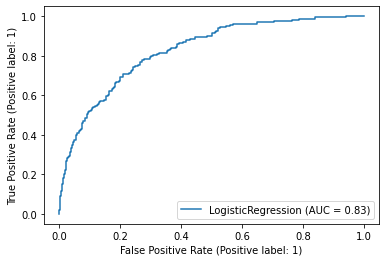

In [25]:
plot_roc_curve(clf, X_test, y_test)

# moving downwards, we're exploring the model's Precision/Recall performance.

## The result shows us that on average, the model has failed 13% of the times to predict customers that would default on their loans (AP = 0.13)

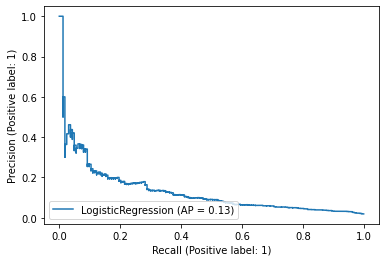

In [26]:
plot_precision_recall_curve(clf, X_test, y_test)

In [28]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

# A Summary of what we've found so far...

## We saw that, typically, our ML model has been inefficient ~7.67% during training and testing.
## The chances that the model will predict the cistomers default probalility are about 98.153% accurate.
## And the odds of the model misclassifing the customers are ~ 1.84%


In [29]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold: ')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 Score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report ')
print(classification_report(y_test, test_pred))

Log loss = 0.07670
AUC = 0.82724
Average Precision = 0.13304

Using 0.5 as threshold: 
Accuracy = 0.98153
Precision = 0.30000
Recall = 0.01840
F1 Score = 0.03468

Classification Report 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8880
           1       0.30      0.02      0.03       163

    accuracy                           0.98      9043
   macro avg       0.64      0.51      0.51      9043
weighted avg       0.97      0.98      0.97      9043



# A confusion matrix to nicely combine the conclusion we found in the report above... 

Confusion Matrix


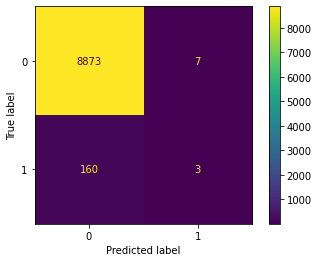

In [30]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

# And finally, we would like to interpret we discoverd so far

In [31]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data = {'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.038367
1,age,-0.040836
2,balance,-0.002252
3,contact,0.000130
4,day,-0.010123
5,duration,-0.000501
6,education,0.000371
7,housing,-0.087714
8,job,0.000387
9,marital,0.030345


## Notice something?
## Yes!!, campaigning has had a tremendous effect on our model's capability of attracting people to make loans and pay them back, lowering the overall defaulting possibilty

## seldomly did any of; day, month, job, education or contact had any effect on our outcome.

## On the other hand, aging, pervious campaign, term deposit subscribtion and housing variables have had a negative affect on our customers' default proabilities.

In [32]:
pd.DataFrame(data = {'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,y,0.319578
1,campaign,3.079508
2,loan,0.367249
3,previous,2.380092


# This tiny table even emphasizes more and more to us the effects these variables have had on the outcome.

## The most influential variable has been the current campaigning startegy
## At 2nd place was previous campaigning startegy
## 3rd was the cusomer's loan-payment past records
## and the least influential among these four was the term deposit subscribtion variable

# Conclusion for this machine learning project:

## We can recomend ABC bank to usually, but not always, avoid lending money to customers a higher age than on average, because we've noted higher default rates in that category.

## & also to watch out customers without housing, because they could potentially default on their loans. Therefor, comes with a higher risk for the bank

# End

# Thank you so much for taking the time to analyze my ML project :)

## Abdullah Kasri
## Data scientist at Data Glacier